In [1]:
import pandas as pd
import time

from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image

from anchor_processing import find_anchors_positives
from triplet_encoding import generate_triplet_dataframe
from shared_constants import *

In [2]:
csv_filename = INPUT_DIR + '/labels_train_small_vgg19_4096.csv'
df = pd.read_csv(csv_filename)

N_ANCHORS = 10
df_anchor_result = find_anchors_positives(df, 'id', 'breed', N_ANCHORS)
df_anchor_result.to_csv(INPUT_DIR + '/labels_train_small_anchor_{n_anchors}_{encoding_strategy}.csv'.format(n_anchors=N_ANCHORS, encoding_strategy='vgg19_4096'), index=False)

basset anchors 


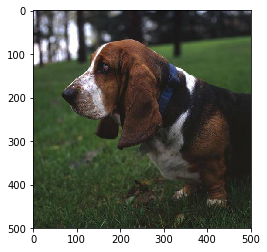

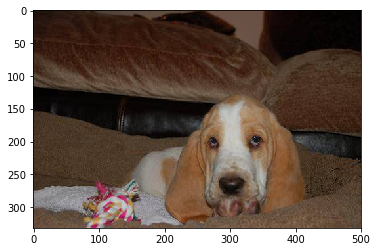

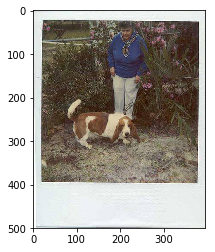

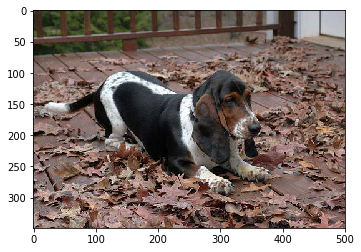

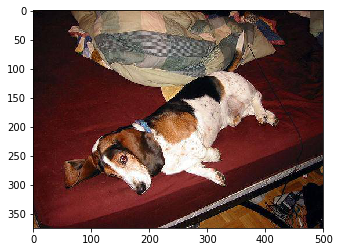

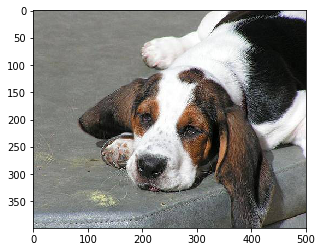

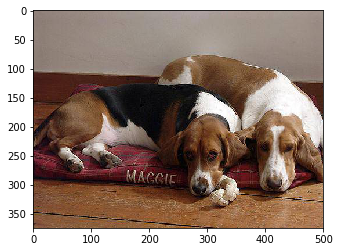

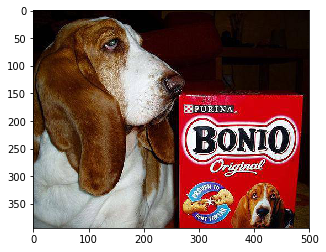

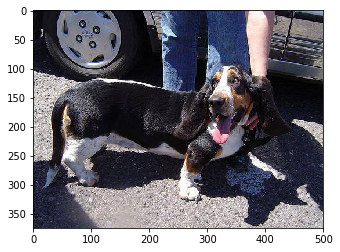

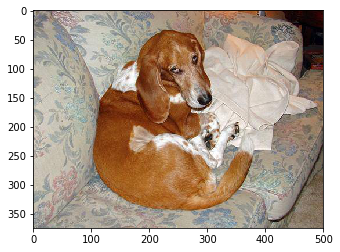

collie anchors 


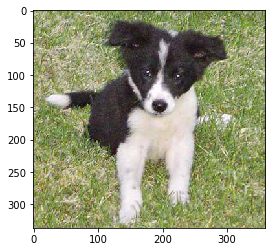

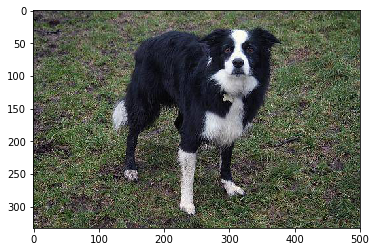

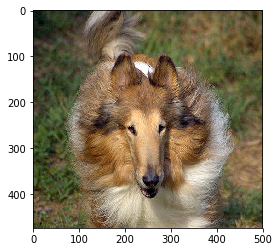

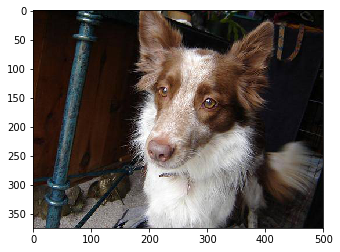

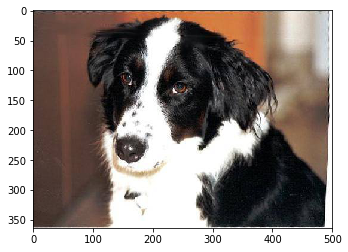

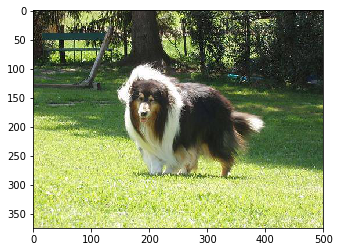

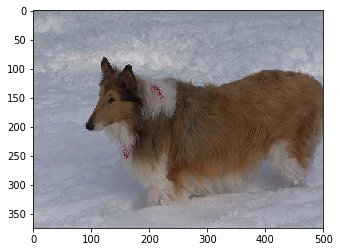

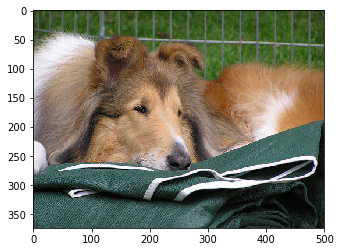

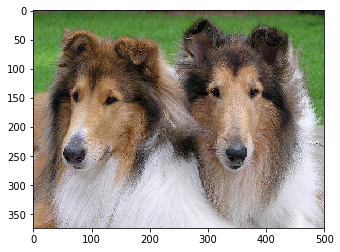

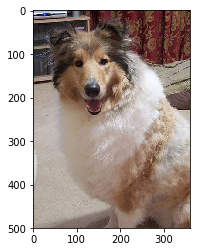

In [ ]:
def show_anchors(breed):
    print(breed + ' anchors ')
    anchors = df_anchor_result[(df_anchor_result[ANP_COL] == 'A') & (df_anchor_result['breed'] == breed)]

    for i, row in anchors.iterrows():
        img = Image.open(IMAGE_DIR + '/{name}.jpg'.format(name=row['id']))
        plt.imshow(img)
        time.sleep(0.1)
        plt.show() 

show_anchors('basset')

show_anchors('collie')

In [ ]:
df_anchor, df_triplet = generate_triplet_dataframe(df_anchor_result, 'id', 'breed', N_ANCHORS)
triplets_csv_filename = INPUT_DIR + '/labels_train_small_triplets_{n_anchors}_{encoding_strategy}.csv'.format(n_anchors=N_ANCHORS,encoding_strategy='vgg19_4096')
df_triplet.to_csv(triplets_csv_filename)